<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Controle-de-Processos/blob/main/Pr%C3%A1tica_1_Resolu%C3%A7%C3%A3o_de_EDO%C2%B4s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

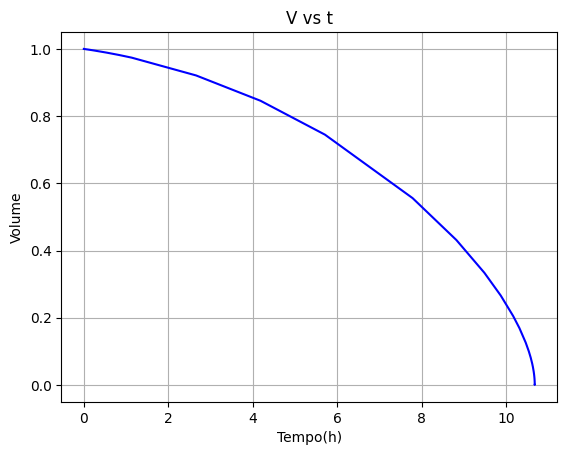

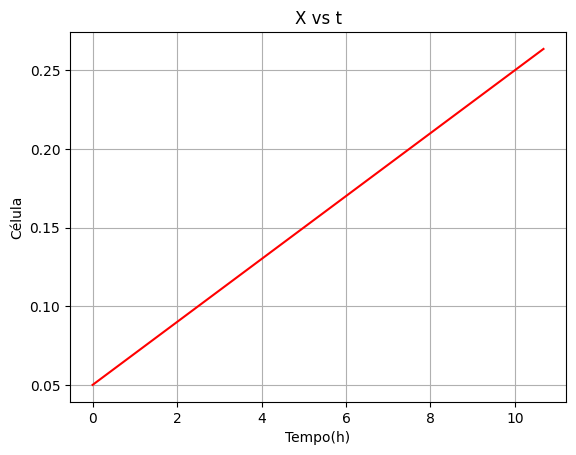

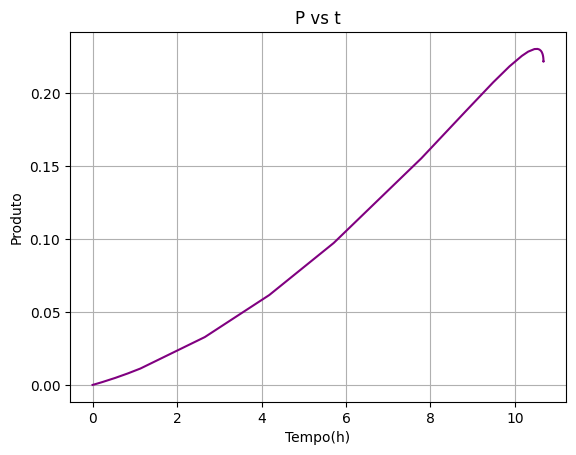

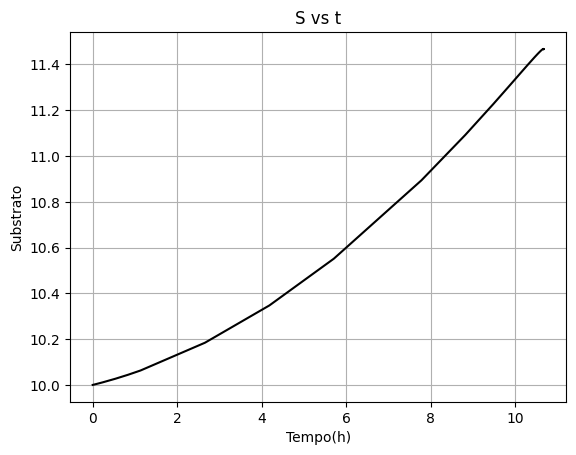

In [1]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# definindo o modelo
def biorreator (t,x,u):

  # parâmetros
  um = 0.2
  Ks = 1.0
  Yxs = 0.5
  Ypx = 0.2

  # variáveis de estado
  X = x[0]
  P = x[1]
  S = x[2]
  V = x[3]

  # variáveis de entrada
  F = u[0]
  Sf = u[1]

  # equações constitutivas
  u = um*(S/(Ks+S))
  rg = u*X
  rp = (1/Ypx)*rg

  # equações do modelo
  dVdt = F
  dXdt = (1/V)*((V*rg)-(dVdt*X))
  dPdt = (1/V)*((V*rp)-(dVdt*P))
  dSdt = (1/V)*((F*Sf)-((1/Yxs)*V*rg)-(dVdt*S))

  return dVdt,dXdt,dPdt,dSdt

# intervalo de integração
tspan = [0.0,30.0] #intervalo do tempo pedido

# condição inicial
xo = [0.05,0.0,10.0,1.0]

# teste de variação das entradas
uo = [0.02,10.0]

# instanciar o modelo
modelo = lambda t,x: biorreator(t, x, uo)

# resolvendo as EDO'S
sol = solve_ivp(modelo, tspan, xo, method='BDF')

# resultados
t = sol.t
x = sol.y

# fazendo os gráficos

plt.figure(1)
plt.plot(t,x[3,:],color = 'blue')
plt.xlabel('Tempo(h)')
plt.ylabel('Volume')
plt.title('V vs t')
plt.grid()

plt.figure(2)
plt.plot(t,x[0,:],color = 'red')
plt.xlabel('Tempo(h)')
plt.ylabel('Célula')
plt.title('X vs t')
plt.grid()

plt.figure(3)
plt.plot(t,x[1,:],color = 'purple')
plt.xlabel('Tempo(h)')
plt.ylabel('Produto')
plt.title('P vs t')
plt.grid()

plt.figure(4)
plt.plot(t,x[2,:],color = 'black')
plt.xlabel('Tempo(h)')
plt.ylabel('Substrato')
plt.title('S vs t')
plt.grid()